# Initiation cells

In [30]:
import sys
from sympy import S
import numpy as np


    
    

def in_notebook():
    """
    Returns ``True`` if the module is running in IPython kernel,
    ``False`` if in IPython shell or other Python shell.
    """
    return 'ipykernel' in sys.modules

if in_notebook():
    print('Running in Notebook')
else:
    print('Running in Shell')

    
prename_of_folder=''    
# parameters for the evolution (can be changed in each evolution run) and are arguments of evolution
pe = {
    'verbose':1,
     }

 

# global parameters 
p={
    'directory': 'data/', 
    'file_filters':[''],
    'plotrange_evolution':[0,0],
}


 

Running in Notebook


### Load & Safe function  &&  Load Parameters from file

In [31]:
import pickle #pickle.dump( data, open( "file.save", "wb" ) ) #data = pickle.load( open( "file.save", "rb" ) )
import sympy.physics.quantum as quantum
import sys  ,os
    

def SaveData(data, filename='', p = p,   pe = pe ,   datadir = p['directory']):  
    folder = SubDirectory(p,pe, datadir)
    if filename == '':
        filename = mydatetime()+'.save'  
    
    
    if not os.path.exists(folder):
        os.makedirs(folder)

    pickle.dump( data, open( folder+filename, "wb" ) ) 
    Log('Saved to '+folder+filename  )
    return folder+filename




def LoadData(dirAndfilename, python2version=True):    
    dirAndfilename = dirAndfilename.replace('file://','')
    if python2version:
        return pickle.load( open( dirAndfilename, "rb" ), encoding='latin1' )
    else:
        return pickle.load( open( dirAndfilename, "rb" ) )

    
    
    
    

def GetpDictOfFile(file):
    if 'rhotable over theta' in file:
        if 'v=2' in file:
            return LoadData(file )[1] 
        else:
            return p
            Log('Use default values, because file: ' +file+' is in the old  format, and does not contain p dictionary')
    elif 'Lineplot.save' in file: 
        # they have the strcuture (reducedtimes, plotvalues, e_ops_labels, p, pe)    
        return LoadData(file )[3] 
    else:
        return LoadData(file )[2] 
    
    




def ExpandDirectories(flist, ending='.save', not_conatin=None):
    newplotfiles = []
    for directory in flist:
        if os.path.isdir(directory):
            for dirpath, dirnames, files in os.walk(directory):
                for name in files:
                    if (ending in name) and (not_conatin==None or not_conatin not in name  ):
                        newplotfiles += [os.path.join(dirpath, name)]
                        #print('Include '+name)
        elif os.path.isfile(directory):
            newplotfiles += [directory]
    return newplotfiles



def ImportpDict(files, importantkeys = ['I2','bool_membrane','N'], p=p  ):
    if len(files) >5:
        files = files[0:5]
    plist=[GetpDictOfFile(file) for file in files]        

    print(plist)
    for key in importantkeys:
        for pi in plist:
            # add default keys if not present
            if not key in pi:
                pi[key] = p[key]
            if not key in plist[0]:
                plist[0][key] = p[key]
            # compare key values 
            if plist[0][key] != pi[key]:
                raise ValueError('The files do not have all identical keys '+key)
        # overwrite default values with the file settings
        print('Overwrite p['+key+'] with file setting '+str(plist[0][key]))
        p[key] = plist[0][key]

        
        
def FilterStrList(files, filters=p['file_filters'] ): 
    if len(filters)==0:
        return files
    else:
        return [f for f in files if all([fil in f for fil in filters])]
        
        
                      
            
    
    

## Load Libraries and define functions

### General Functions

In [32]:
#to limit the memory look here https://is.gd/h6TPbs



#from __future__ import (absolute_import, division, print_function,
#                        unicode_literals)

 


if  in_notebook():
    %matplotlib inline  
    import matplotlib
    matplotlib.use("pgf")
#     matplotlib.use('Agg')
else:
    import matplotlib
    matplotlib.use('Agg')
    

custom_preamble = {
    "mathtext.fontset": "stix",  
    #"font.family": "serif", # use serif/main font for text elements
    "text.usetex": False,    # if you enable that, the Tomography plot will take super super long...... hours.....
#    'text.latex.unicode': True,      # cannot do this or pickle import from version2 won't work 
#    "pgf.rcfonts": False,   # don't setup fonts from rc parameters
    "pgf.preamble": [
         "\\usepackage{units}",         # load additional packages
#         "\\usepackage{metalogo}",
         "\\usepackage{unicode-math}",  # unicode math setup
#         r"\setmathfont{xits-math.otf}",
#         r"\setmainfont{DejaVu Serif}", # serif font via preamble
         r"\usepackage{amsmath,amscd, amsfonts, amssymb, amsthm}", 
         ]
}
matplotlib.rcParams.update(custom_preamble)
    

from scipy import optimize  
from scipy import integrate  
import random 
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.collections import PolyCollection
from matplotlib.colors import colorConverter
from matplotlib.backends.backend_pdf import PdfPages
from matplotlib.ticker import FormatStrFormatter
import matplotlib.ticker as ticker
import matplotlib.patches as patches
#matplotlib.rcParams['mathtext.fontset'] = 'stix'
#matplotlib.rc('text', usetex = True)


#plt.rcParams['mathtext.fontset'] = 'stix'
#plt.rcParams['font.family'] = "sans-serif"
#plt.rcParams['font.sans-serif'] = "Helvetica"
#plt.rcParams['text.usetex'] = True


if in_notebook():
    import ipywidgets  as widgets 
    from terminaltables import AsciiTable
import sympy.physics.wigner  as wigner   
#import statsmodels.stats.moment_helpers as mh
import matplotlib.gridspec as gridspec
import datetime
import time
import matplotlib.backends.backend_pdf
import sympy.physics.quantum as quantum
if not in_notebook():
    #sys.path.append(os.path.abspath("/home/alexander/work/Promotion/Notes/python/"))
    sys.path.append(os.path.abspath("/home/alexander/work/Promotion/Notes/python/odeintw"))
    sys.path.append(os.path.abspath("/home/alexander/Daten/Uni/Promotion/Notes/python/odeintw"))
    sys.path.append(os.path.abspath("/bigwork/nhbbalex/odeintw"))
    from odeintw import odeintw
else:
    from odeintw.odeintw import odeintw
    
    
    
import qutip   as qu

import colorsys




def GetCommonStr(strlist):
    prefix_len = len(strlist[0])
    for x in strlist[1 : ]:
        prefix_len = min(prefix_len, len(x))
        while not x.startswith(strlist[0][ : prefix_len]):
            prefix_len -= 1

    return strlist[0][ : prefix_len]


def Matrix0(M):
    return not np.any(M)

def FlattenTopDim(arr):  # flattens the first dim
    if not isinstance(arr, np.ndarray):
        arr = np.array(arr)
    return arr.reshape(-1, arr.shape[-1])


def GetColumn(arr, col):
    if not isinstance(arr, np.ndarray):
        arr = np.array(arr)
    return arr[:,col]
    
def AddColumnTo2Darray(arr, col):  ## inserts a new column in a 2d array 
    return np.concatenate(( np.array([col]).transpose(),arr), axis=1)



def ApplyfOn3dArray(flist, f ,column=1 ):  # does f(flist[i][j][column]) forall i,j
    if not isinstance(flist, np.ndarray):
        flist = np.array(flist)
    splitarray = np.hsplit(FlattenTopDim(flist),(0,1))
    splitarray[column+1] = f(splitarray[column+1])
    mergeback = np.hstack( [splitarray[1+i] for i in range(len(splitarray)-1)])
    return np.reshape(mergeback,flist.shape)   
#print(ApplyfOn3dArray(flist, np.real) == flist)
#ApplyfOn3dArray(flist, np.exp) 




def mydatetime():
    return datetime.datetime.now().strftime("%Y-%m-%d_%H-%M-%S-%f")



            
def identityFunction(*args):
    if len(args) == 1:
        return args[0]
    return args



def float2str(n, dec=2, latex=False):
    if isinstance(n, str):
        return n
    if n==0:    return '0'
    
    if latex:
        ret_string = '{0:.{1:d}e}'.format(n, dec)
        if not("e" in ret_string):   return ret_string
        a,b = ret_string.split("e")
        b = int(b) #removed leading "+" and strips leading zeros too.
        return a + r' \cdot 10^{' + str(b)+r'}'
    else:
        fs = '%.'+str(dec+1)+'g'
        return fs % n


def xy_fmt(x, pos):
    return float2str(x) 


def comp2str(n, dec_real=2, dec_im=2, latex=False): 
    if isinstance(n,np.ndarray):
        n=n.tolist()
    
    if isinstance(n, float) or  isinstance(n, int):    
        return float2str(n.real,dec_real,latex) 
    elif isinstance(n, complex):    
        if n.imag == 0:
            return float2str(n.real,dec_real,latex) 
        if n.imag >0:  sepstr = ' +'
        else:  sepstr = ' -'
        return float2str(n.real,dec_real,latex)+sepstr+'i'+float2str(abs(n.imag),dec_im,latex)
    else:        
        return str(n)
    


def matrix2str(M, dec=2,latex=False):
    if len(np.array(M).shape)!=2:
        return str(M)  
    
    if latex:  
        preamble = r'\begin{pmatrix}'
        postamble =  r'\end{pmatrix}'
        lineend = r'\\'
        sep = r'&'
    else:
        preamble = r'['
        postamble =  r']'
        lineend = r'\n'
        sep = r','
    
    res = preamble
    
    for line in M:
        for v in line:
            res += comp2str(v, dec_real=dec, dec_im=dec,latex=latex)+sep
        res += lineend
    return res + postamble
    
    

def div2str(div,lineend=', ')    :
    if isinstance(div, list) or isinstance(div,np.ndarray):
        result = matrix2str(div)
    elif isinstance(div, qu.Qobj):
        result = 'Qobj: '
        result = result+ comp2str(div.norm(norm='max'))
    elif isinstance(div, complex):  
        result = comp2str(div)
    elif isinstance(div, float):  
        result = float2str(div)
    else:  
        result = str(div)
    return result





globaltimedict={}
def printtime(name,  title='', output=True, unit='s', deletetimer=True):
    global globaltimedict
    
    if name in globaltimedict:
        delta = time.clock() - globaltimedict[name]
        if deletetimer:
            del globaltimedict[name]

        if unit =='ms':
            delta = delta*1e3
        elif unit =='mus':
            delta = delta*1e6
        elif unit =='ns':
            delta = delta*1e9
        elif unit =='min':
            delta = delta/60
        elif unit =='h':
            delta = delta/3600
        elif unit =='d':
            delta = delta/3600/24
        tstart = time.clock()

        outstr=float2str( delta)+' '+unit+' for Timer: '+name+' '+str(title)
    else:
        globaltimedict[name] = time.clock() 
        delta = 0 
        outstr='Starting Timer: '+name+' '+str(title)
    if output:
        print(outstr)
    return delta , outstr


def merge_dicts(*dict_args):
    """
    Given any number of dicts, shallow copy and merge into a new dict,
    precedence goes to key value pairs in latter dicts.
    """
    result = {}
    for dictionary in dict_args:
        result.update(dictionary)
    return result



def dic2str(dic, removelist=["rhoinitial",'tlist',"verbose",'directory','plot_files','plot_function_files','plot_file_labels','file_filters','plot_output',
                             'sweep_rnd_rho0','plotrange_evolution','debug_output','store_only_SS'], lineend=',', shorten=True ):
    result=''
    mydic = {}
    for k in dic.keys():
        if not( k in removelist):
            mydic[k] = dic[k]
    
     
    if 'tlist' in dic:
        mydic['t'] = dic['tlist'][-1]
        mydic['tsteps'] = len(dic['tlist'])
    
#     for key in removelist:
#         if key in mydic:
#             del mydic[key]
    
    keys = list(enumerate(sorted(mydic.keys()))) 
    for i,key in keys:
        if shorten and len(key)>1:
            skey = key[0]+key[-1]
        else:
            skey = key
            
        valuestr = div2str(mydic[key])
        if  (i+1<len(keys)) and (valuestr == div2str(mydic[keys[i+1][1]])):
            result += skey+' = '
        else:
            if shorten: valuestr = valuestr[0:10]        
            result += skey+' = '+valuestr+lineend
        
    if shorten:
        result = result.replace(' ','')
    return result



def Path2Dir(path, sep_char = '/', end_sep=True):
    directory = sep_char.join(path.split(sep_char)[:-1])
    if end_sep:
        directory = directory+sep_char
    return directory


def Path2Filename(path, sep_char = '/', RemoveEnding = False ): 
    filename = path.split(sep_char)[-1]
    if RemoveEnding:
        filename = '.'.join(filename.split('.')[:-1])
    return filename




def SubDirectory(p = p,   pe = pe,   datadir = p['directory']): 
    return datadir+dic2str(p)+'/'+prename_of_folder+dic2str(pe)+'/'
    

    

fid = mydatetime()
logfilename = fid+'.log'
logdir = SubDirectory(pe=pe)
def Log(args, folder = logdir, separator = ' ', bool_brackets=False, name=logfilename, output = True): 
    if not os.path.exists(folder):
        os.makedirs(folder)

    with  open(folder+name  ,'a')  as file:
        file.write('\n')
        if bool_brackets:
            file.write('(')

        if isinstance(args, list):
            for line in args:
                file.write(str(line)+separator)
        else:
            file.write(str(args)+separator)
        if bool_brackets:
            file.write(')')
    if output:
        print(args)
         

if not in_notebook():
    for arg in  (args):
         Log((arg, getattr(parser.parse_args(), arg)))

            
            



def WriteVarValue(varname,varvalue, folder = 'Calc4Latex/'):     
    if not os.path.exists(folder):
        os.makedirs(folder)
        
    with  open(folder+varname  ,'w')  as file:
        file.write(float2str( varvalue, latex=True))
#     print(varname+': '+sci_notation( varvalue))
            
    
#def Log(*args  ): 
#    separator = ' '
#    bool_brackets=False
#    #logfilename=logfilename
#    datadir = p['directory']
#    if not in_notebook() :
#        if not os.path.exists(datadir):
#            os.makedirs(datadir)
#
#        file = open(datadir+logfilename  ,'a') 
#        file.write('\n')
#        if bool_brackets:
#            file.write('(')
#        for line in args:
#            file.write(str(line)+separator)
#        if bool_brackets:
#            file.write(')')
#        file.close() 
         
    
print('Qutip version '+qu.__version__)    
if qu.__version__ > '4.0.2':
    Log('Qutip version is '+str(qu.__version__)+' This means the change happend:  Qobj.data --> Qobj._data . This means you cant import older files (and plot them) ')
        
Log('loaded libraries')      
    

    
def reshapeFillwith(array,MatrixWidth, fillValue=0):
    if np.fmod(len(array), int(MatrixWidth))!=0:
        array = np.append(array,np.zeros([MatrixWidth-np.fmod(len(array), int(MatrixWidth))]))
    return array.reshape([-1,MatrixWidth])
    
def ExtractSublistfromArray(array, sublist, defaultreturn=[0,1], requiredlength=-1):
    if len(sublist)==1: 
        if (sublist[0]  < len(array)) and (requiredlength<=len(array)): return [array[sublist[0]]]
        else:                                                           return [defaultreturn[0]]
    else:
        return [ExtractSublistfromArray(array, [item], defaultreturn=[defaultreturn[idx]], requiredlength=requiredlength)[0] 
                for idx, item in enumerate(sublist)]            
# ExtractSublistfromArray([1,2,3,4,5], [1,7], defaultreturn=[0,1])



def ArraysIdentical(a,b):
    r=len(a)==len(b)
    for i in range(len(a)):
        r =  r and (a[i]==b[i])
    return r

 
def Flatten(a):
    return [j for i in a for j in i]
 

def vec2Matrix(vec, reference_matrix_for_shape):
    i = 0
    result= reference_matrix_for_shape
    for r in range(len(reference_matrix_for_shape)):
        for c in range(len(reference_matrix_for_shape[r])):
            result[r][c] =  vec[i]
            i=i+1 
    return result


#testM =  np.array([[1,2,3,4], [113,115]])
#testzeros =  np.array([[0,0,0,0], [0,0]])
#Log(Flatten(testM))
#Log(vec2Matrix(Flatten(testM),testzeros))

rhoss=[]



     

 
    
def StrListJoin(a):
    r=''
    for i in a:
        r=r+str(i)
    return r    




def StrListTableJoin(a,values,delim='=',linebreak='\n'):
    
    if len(a)>len(values):
        a = a[0:len(values)]
    
    if len(a)<len(values):
        a += ['' for i in range(len(values)-len(a))]
    
    r=''
    for i in range(len(a)): 
        r += str(a[i])+'$'+delim+comp2str(values[i], dec_real=4, dec_im=4)+'$'
        if i < len(a)-1:
            r += linebreak
    return r




    
def ClebschGordan(j1, m1, j2, m2, j3, m3 ) :   
    return np.float(quantum.cg.CG(S(j1), S(m1), S(j2), S(m2), S(j3), S(m3)).doit().evalf())


def RangeCoupledAngularMomenta(I,J):
    return [abs(I-J)+i   for i in range( int(abs(  abs(I-J) -abs(I+J))) +1)] 

Qutip version 4.0.2
loaded libraries


/home/alexander/programs/anaconda3/lib/python3.5/site-packages/matplotlib/__init__.py:1401: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


### PlotFunctions

Starting Timer: BarPlot 


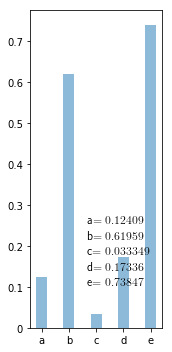

3.73 s for Timer: BarPlot 


In [33]:

def SafeAndShowfig(fig, save_fig, save_fig_name, save_fig_folder): 
    if save_fig: 
        if save_fig_name =='':
            save_fig_name = mydatetime()+".pdf"

        if not os.path.exists(save_fig_folder):
            os.makedirs(save_fig_folder)
            
        if  isinstance(save_fig_name , matplotlib.backends.backend_pdf.PdfPages):
            save_fig_name.savefig()  
        else:
            plt.savefig(save_fig_folder+save_fig_name)  
            
    if  in_notebook():  plt.show(fig)
    else:               plt.close(fig)
    
    
    
    
def TextPlot(text, size=(0,0), save_fig=False,save_fig_name='', save_fig_folder=p['directory']):   # try  text= r'$\sigma\\\rho$'  and 'aaa\nbbbb'
    if pe['verbose']>0:    
        printtime('TextPlot')
    fig = plt.figure()
        
    if size == (0,0):
        size = (20,8 )
    fig.set_size_inches( size )
        
        
    # build a rectangle in axes coords
    left, width = .25, .5
    bottom, height = .25, .5
    right = left + width
    top = bottom + height

    ax = fig.add_axes([0,0,1,1])

    # axes coordinates are 0,0 is bottom left and 1,1 is upper right
    p = patches.Rectangle(
        (left, bottom), width, height,
        fill=False, transform=ax.transAxes, clip_on=False,
        color='white'
        )

    ax.text(left, bottom, text,
            horizontalalignment='left',
            verticalalignment='center',
            fontsize=6, 
            transform=ax.transAxes, usetex=True)

    ax.set_axis_off()
    
    
    SafeAndShowfig(fig, save_fig, save_fig_name, save_fig_folder)
    if pe['verbose']>0:    printtime('TextPlot')
    return fig


    


def SubBarPlot(y_list, gsposition, xlist=[], title=''): 
    bar_width=0
    n_groups = len(y_list)
    if len(xlist)==0:  xlist = range(len(y_list))
    
    ax = plt.subplot(gsposition)
    index = np.arange(n_groups)  
    rects1 = plt.bar(index, y_list, width=0.4,alpha=0.5)

    
    #plt.xlabel('')
    #plt.ylabel('')
    plt.title(title, usetex=True)
    ax.xaxis.set_major_formatter(ticker.FuncFormatter(xy_fmt))
    ax.yaxis.set_major_formatter(ticker.FuncFormatter(xy_fmt))
    plt.xticks(index + bar_width/2., xlist)    
    plt.tight_layout()     
    #plt.annotate(StrListTableJoin(xlabels,ydata), fontsize=12, xy=(len(ydata)/3., 0))
    if len(y_list)>0:
        plt.annotate(StrListTableJoin(xlist,y_list), fontsize=12, xy=(len(y_list)/3., min(y_list)+1/10 * max(y_list)), usetex=True)
    #plt.legend(, usetex=True)

    
    

def BarPlot(y_list, xlist=[], title='',size=(0,0),   save_fig=False,save_fig_name='', save_fig_folder=p['directory']):
    if pe['verbose']>0:    
        printtime('BarPlot')
    fig = plt.figure()

    
    if size == (0,0):  size = (max(len(y_list),5)/2,5)
        
    fig.set_size_inches( size )
    SubBarPlot(y_list, gridspec.GridSpec(1,1, width_ratios=[1])[0,0], xlist=xlist, title=title)
    
    SafeAndShowfig(fig, save_fig, save_fig_name, save_fig_folder)
    if pe['verbose']>0:     printtime('BarPlot')
    return fig
        
if pe['verbose']>0:    
    BarPlot( np.random.rand(5) ,xlist=['a','b','c','d','e']  )     

Starting Timer: FacePlot 


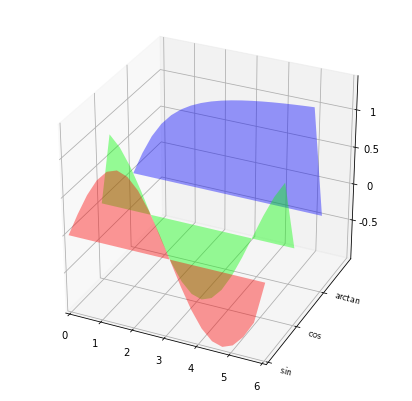

0.502 s for Timer: FacePlot 


In [34]:
def SubFacePlot(flist, flabels=[],xlist=[0,1], title='',size=(7,7), zoom=1, ProjectStartValuesDown=True, alpha=0.4, x_label='', y_label='', f_label='', rot_anlge=-65, logplot=False,   f=np.real): 
    if len(xlist)==2: xlist = np.linspace(xlist[0],xlist[1],len(flist[0]))
    flist = np.array([np.stack( (xlist,f)).transpose()  for f in flist])
    
    
    ax = plt.gca(projection='3d')     
    ax.view_init(azim=rot_anlge)     # Set rotation angle to 30 degrees
    ax.get_proj = lambda: np.dot(Axes3D.get_proj(ax), np.diag([size[0]/max(size), size[1]/max(size), size[1]/max(size), 1/zoom]))   # the first the variables are the xyz. You can shrink them to make it look better
    
    def logf(x): 
        res =  np.log(f(x))
        np.putmask(res, res < -20, -20)
        return res
    if logplot:
        flist = ApplyfOn3dArray(flist, logf)
        
    else:
        flist = ApplyfOn3dArray(flist, f)
    
    if ProjectStartValuesDown:
        for i in range(len(flist)):
            flist[i][0][1]=0
            flist[i][-1][1]=0
    
    poly = PolyCollection(flist, facecolors = [ colorsys.hsv_to_rgb(i/len(flist), 1, 1)  for i in range(len(flist))  ])
    poly.set_alpha(alpha)
    ax.add_collection3d(poly, zs=range(len(flist)), zdir='y')
    
    
    
    if x_label != '':
        ax.set_xlabel(x_label)    
    #  flist thas the axes(shape)   [f,t,y] ^= [0,1,2]
    xvlaues =  GetColumn(FlattenTopDim(flist),0)
    ax.xaxis.set_major_formatter(ticker.FuncFormatter(xy_fmt))
    ax.yaxis.set_major_formatter(ticker.FuncFormatter(xy_fmt))
    ax.zaxis.set_major_formatter(ticker.FuncFormatter(xy_fmt))
    ax.set_xlim3d(min(xvlaues) , max(xvlaues)  )
    
    
    if f_label != '':
        ax.set_ylabel(f_label)
    ax.set_ylim3d(0, len(flist)  ) 
    ax.set_yticks(  range(len(flist)) ) 
    ax.set_yticklabels(flabels,rotation=-15,    verticalalignment='bottom', horizontalalignment='left', usetex=True)
    
    # determine min of 
    
    if y_label != '':
        ax.set_zlabel(y_label, usetex=True)
    #  flist thas the axes(shape)   [f,t,y] ^= [0,1,2]
    zvlaues =   GetColumn(FlattenTopDim(flist),1)
    if logplot:
        ax.set_zlim3d(max(min(zvlaues),-7) , max(zvlaues) )
    else:
        ax.set_zlim3d(min(zvlaues) , max(zvlaues) )
    
    plt.title(title, y=1.08, usetex=True)  

    
    
    
def FacePlot(flist, flabels=[], xlist=[0,1], title='',size=(7,7), zoom=1, ProjectStartValuesDown=True, alpha=0.4, x_label='', y_label='', f_label='', rot_anlge=-65,
                    save_fig=False, save_fig_name='', save_fig_folder=p['directory'], logplot=False,   f=np.real): 
    if pe['verbose']>0:    
        printtime('FacePlot')
    fig = plt.figure()     
    fig.set_size_inches( np.average(size) ,np.average(size) )     # the x value goes into the scaling below  

    
    SubFacePlot(flist, flabels=flabels, xlist=xlist, title=title, size=size, zoom=zoom,
                        ProjectStartValuesDown=ProjectStartValuesDown, alpha=alpha, x_label=x_label, y_label=y_label, f_label=f_label, rot_anlge=rot_anlge,
                       logplot=logplot,   f=f)
    
    SafeAndShowfig(fig, save_fig, save_fig_name, save_fig_folder)
    if pe['verbose']>0:     printtime('FacePlot')
    return fig
    

    
if pe['verbose']>0:    
    tempX=np.linspace(0,6,20)    
    FacePlot( [np.sin(tempX),np.cos(tempX),np.arctan(tempX)] , flabels=["sin","cos","arctan"] , xlist=[min(tempX),max(tempX)])    

Starting Timer: LinePlot 


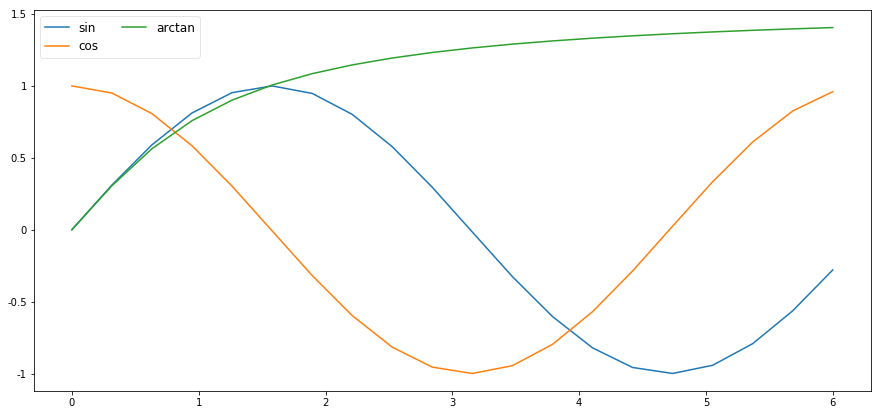

0.604 s for Timer: LinePlot 


In [35]:
def SubLinePlot(flist, gsposition, flabels=[], xlist=[0,1], title='', logplot=False,xrange='All',yrange='Auto'
               ,xlabel='',ylabel='', f=np.real): 
    if len(xlist)==2: xlist = np.linspace(xlist[0],xlist[1],len(flist[0]))
    ax = plt.subplot(gsposition)
    if xrange!='All':  ax.set_xlim( xrange)
    if logplot :  ax.set_yscale('log')
    
    # remove neg functions if logplot
    if logplot:
        flistnew = []
        flabelsnew = []
        for i,ys in enumerate(flist):
            if ((f(ys)>0).any()):
                flistnew += [ys]
                if i<=len(flabels)-1:   flabelsnew += [flabels[i]]
            else:
                if i<=len(flabels)-1:   templabel= flabels[i]
                else: templabel='function'
                Log('Removed '+templabel+' from plotting because its <=0 and logpolot can not show these')
        flist = flistnew
        flabels = flabelsnew

    
    for ys in flist:
        ax.plot(xlist, f(ys))
    ax.xaxis.set_major_formatter(ticker.FuncFormatter(xy_fmt))
    ax.yaxis.set_major_formatter(ticker.FuncFormatter(xy_fmt))
    ax.set_xlabel(xlabel, usetex=True)
    ax.set_ylabel(ylabel, usetex=True)
    plt.title(title, usetex=True)
    
    
    # Shrink current axis by 20%
    #box = ax.get_position()
    #ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
    #put legend outside plot
    #ax.legend(flabels, loc='center left',bbox_to_anchor=(1, 1))
    ax.legend(flabels, ncol=2 ,framealpha=.5 ,fontsize=12 )

    if yrange=='Auto':
        plt.autoscale(enable=True, axis='y')
    else:
        plt.ylim(yrange)
    #ax.autoscale_view()
    #plt.show(fig 


    
        

def LinePlot(flist , flabels=[], xlist=[0,1], title='', size=(15,7), logplot=False,xrange='All',yrange='Auto', f=np.real,xlabel='',ylabel=''
            ,save_fig=False, save_fig_name='', save_fig_folder=p['directory']): 
    if pe['verbose']>0:    printtime('LinePlot')
    fig = plt.figure() 
    fig.set_size_inches( size )
    
    SubLinePlot(flist,  gridspec.GridSpec(1,1, width_ratios=[1])[0,0], flabels=flabels, xlist=xlist,title=title,
                logplot=logplot,xrange=xrange,yrange=yrange,xlabel=xlabel, ylabel=ylabel ,f=f) 
   

    SafeAndShowfig(fig, save_fig, save_fig_name, save_fig_folder)
    if pe['verbose']>0:     printtime('LinePlot')
    return fig
        
        

if pe['verbose']>0:    
    tempX=np.linspace(0,6,20)    
    LinePlot( [np.sin(tempX),np.cos(tempX),np.arctan(tempX)] , flabels=["sin","cos","arctan"] , xlist=[min(tempX),max(tempX)])            

Starting Timer: ContourPlot 


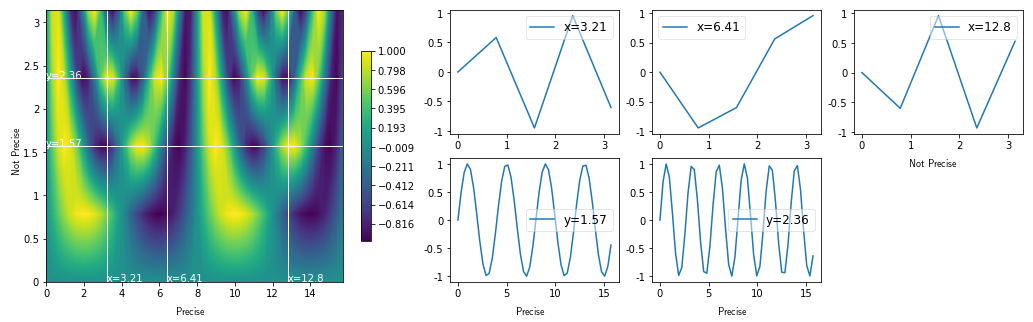

2.16 s for Timer: ContourPlot 


In [36]:
def SubContourPlot(M, gsposition=gridspec.GridSpec(1,1)[0,0], xlist=[0,1], ylist=[0,1], count_levels=100
                , title='', size=(7,7), logplot=False, f=np.real,xlabel='',ylabel='', x_cuts=[], y_cuts=[]): 
    if len(xlist)==2:     xlist = np.linspace(xlist[0], xlist[1] , len(M[0]))
    if len(ylist)==2:     ylist = np.linspace(ylist[0], ylist[1] , len(M))
    M=f(M)
        
    X, Y = np.meshgrid(xlist  , ylist)

    ax = plt.subplot(gsposition)
    
    levels = np.linspace(np.min(M), np.max(M), count_levels)
    if np.min(M)==np.max(M):
        levels=None
    cs = ax.contourf(X, Y, M, levels=levels)
    plt.colorbar(cs, shrink=.7)# , format="%.1e")

    ax.hlines(ylist[y_cuts], min(xlist), max(xlist),linewidth=1, color='white')
    ax.vlines(xlist[x_cuts], min(ylist), max(ylist),linewidth=1, color='white')

    for x_cut in x_cuts:  ax.annotate('x='+float2str(xlist[x_cut]), xy=(xlist[x_cut],ylist[0]) , color='white' )
    for y_cut in y_cuts:  ax.annotate('y='+float2str(ylist[y_cut]), xy=(xlist[0],ylist[y_cut]) , color='white' )

    ax.set_xlabel(xlabel, usetex=True)
    ax.set_ylabel(ylabel, usetex=True)
    ax.xaxis.set_major_formatter(ticker.FuncFormatter(xy_fmt))
    ax.yaxis.set_major_formatter(ticker.FuncFormatter(xy_fmt))
    plt.title(title, usetex=True)
    
    
    
    
        

def ContourPlot(M, xlist=[0,1], ylist=[0,1], count_levels=100
                , title='', size=(7,5), logplot=False, f=np.real,xlabel='',ylabel=''
            ,save_fig=False, save_fig_name='', save_fig_folder=p['directory'], x_cuts=[], y_cuts=[]): 
    if pe['verbose']>0:    printtime('ContourPlot')

    M=np.array(M)

    fig = plt.figure()         
    nrows = 2
    ncols = 2+max(len(x_cuts),len(y_cuts))
    fig.set_size_inches( (size[0]*0.5*ncols, size[1]) )
    
    gs = gridspec.GridSpec(nrows,ncols)
    if len(xlist)==2:     xlist = np.linspace(xlist[0], xlist[1] , len(M[0]))
    if len(ylist)==2:     ylist = np.linspace(ylist[0], ylist[1] , len(M))
    ax = SubContourPlot(M,gs[:,:2], xlist=xlist, ylist=ylist,  title=title, logplot=logplot,xlabel=xlabel, ylabel=ylabel ,f=f, x_cuts=x_cuts, y_cuts=y_cuts) 

    for idx,x_cut in enumerate(x_cuts):
        SubLinePlot([M[:,x_cut]], gs[0,2+idx], flabels=['x='+float2str(xlist[x_cut])], xlist=ylist, xlabel=ylabel)
    for idx,y_cut in enumerate(y_cuts):
        SubLinePlot([M[y_cut]], gs[1,2+idx], flabels=['y='+float2str(ylist[y_cut])], xlist=xlist, xlabel=xlabel)

    SafeAndShowfig(fig, save_fig, save_fig_name, save_fig_folder)
    if pe['verbose']>0:     printtime('ContourPlot')
    return fig       
        
        
if pe['verbose']>0:    
    tempX = np.linspace(0,5*np.pi,50)
    tempY = np.linspace(0,np.pi,5)
    ContourPlot(  np.sin([[x*y for x in tempX] for y in tempY]), xlist=tempX, ylist=tempY , x_cuts=[10,20,40] , y_cuts=[2,3],
               xlabel='Precise',ylabel='Not Precise')

Starting Timer: Tomography 


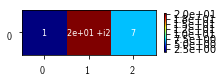

0.394 s for Timer: Tomography 
Starting Timer: Tomography 


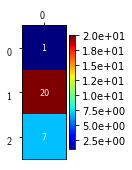

0.363 s for Timer: Tomography 
Starting Timer: Tomography 


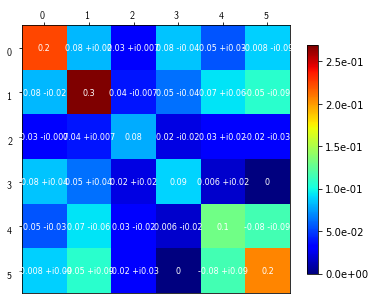

2.15 s for Timer: Tomography 


In [37]:
def SubMatrixTomography(Matrix, gsposition, xlabels=None, ylabels=None, title='', f=np.abs, flabels=identityFunction , IsLog=False,dec_real=0,
                           show_colorbar=True):
    if isinstance(Matrix, list):
        M = np.array(Matrix)
    else: 
        M = Matrix
    
    if isinstance(M[0][0] , qu.Qobj):  # if the entries of the matrix are operators, take the norm of each operator
        M = np.array([[(M[i][j]).norm(norm='max') 
                       for j in range(len(M[i]))] 
                       for i in range(len(M))])
        title = title + ' Entries $=$ Qobj''s $=> |\cdot|_\infty $ '
        
    Morg = M    
    M=f(M)
    if IsLog:
        M=np.log(M)
    #Log(M)
    #M = [[np.sin(i*j) for j in range(10)] for i in range(10)]
    
    
    dimx = len(M)
    dimy = len(M[0])    
    ax = plt.subplot(gsposition) 
    cax = ax.imshow(M, interpolation='none',    cmap='jet', origin='upper',extent = [0,dimy,0,dimx] )
    if show_colorbar:
        plt.colorbar(cax, shrink=.7 , format="%.1e")
    
    font_dict = {'size':8}
    for r in range(len(M)):
        for c in range(len(M[r])):            
            ax.text(c+.5, dimx-1-r+.5, comp2str(flabels(Morg[r][c]),dec_real=dec_real,dec_im=dec_real), color='white', horizontalalignment='center'
                        , verticalalignment='center', fontdict=font_dict, usetex=False)
            #ax.annotate(comp2str(flabels(Morg[r][c]),dec_real=dec_real,dec_im=dec_real), (c+.5,dimx-1-r+.5) ,color='white', horizontalalignment='center'
            #            , verticalalignment='center' )
    
    # Shift ticks to be at 0.5, 1.5, etc
    for axis in [ax.xaxis ]:
        axis.set(ticks=np.arange(0.5, dimy ))
    for axis in [ax.yaxis]:
        axis.set(ticks=np.arange(0.5, dimx ))
    if dimx>1:
        ax.xaxis.set_ticks_position('top') # the rest is the same
        
    
    if xlabels:
        ax.set_xticklabels(xlabels, usetex=True)
    else:
        ax.set_xticklabels(range(dimy), usetex=True)
    if ylabels:
        ax.set_yticklabels(reversed(ylabels), usetex=True)
    else:
        ax.set_yticklabels(reversed(range(dimx)), usetex=True)
    plt.title(title, y=1.08, usetex=True) 


    
    


def Tomography(state_or_M, size=(0,0),  xlabels=None, ylabels=None, title='', f='automatic' , IsLog=False,dec_real=0,
              save_fig=False,save_fig_name='', save_fig_folder=p['directory'],  show_colorbar=True): 
    if pe['verbose']>0:    
        printtime('Tomography')
    fig = plt.figure() 
    if isinstance(state_or_M, qu.Qobj):
        state_or_M = state_or_M.full()

    
    if f=='automatic':
        if np.array_equal(np.imag(state_or_M) , np.zeros_like(state_or_M)  ) :
            f=np.real
        else:
            f=np.abs
        
        
        
    if isinstance(f,list):
        lenf = len(f)
    else:
        lenf = 1
    
    if size == (0,0):        
        size = (len(state_or_M[0])*lenf,len(state_or_M))
    fig.set_size_inches( size )
    
    if isinstance(f,list):
        gs = gridspec.GridSpec(1, len(f) )
    else:
        gs = gridspec.GridSpec(1, 1  )
        
    if isinstance(f,list):
        for i in range(len(f)):
            SubMatrixTomography(state_or_M, gs[0,i],  
                              xlabels=xlabels, ylabels=ylabels, title=title+'  f='+f[i].__name__, f=f[i], flabels=f[i], IsLog=IsLog,dec_real=dec_real,show_colorbar=show_colorbar)
    else:
        SubMatrixTomography(state_or_M, gs[0,0],  
                          xlabels=xlabels, ylabels=ylabels, title=title, f=f , IsLog=IsLog,dec_real=dec_real,show_colorbar=show_colorbar)
       
    SafeAndShowfig(fig, save_fig, save_fig_name, save_fig_folder)
    if pe['verbose']>0:            printtime('Tomography')
    return fig
        
    
if pe['verbose']>0:    
    Tomography([[1,20+2*1j,7]] )
    Tomography([[1],[20],[7]])

    temprho = qu.rand_dm(6)
    Tomography(temprho, save_fig=True)

Starting Timer: LineDoubleLogPlot 


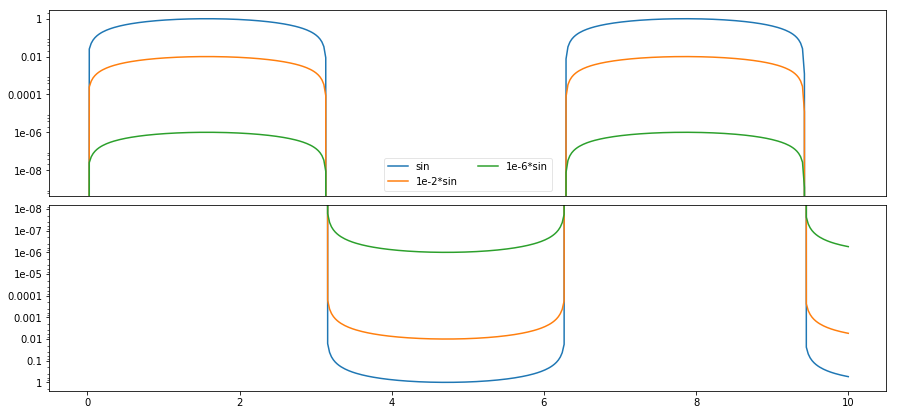

1.32 s for Timer: LineDoubleLogPlot 


In [38]:
def SubLineDoubleLogPlot(flist,gsposition1,gsposition2, flabels=[], xlist=[0,1],  title='', xrange='All',yrange='Auto'
               ,xlabel='',ylabel='', f=np.real): 
    if len(xlist)==2: xlist = np.linspace(xlist[0],xlist[1],len(flist[0]))
    
    allpositive = np.array(flist)
    allpositive[allpositive<0]=0
    allpositive = f(np.abs( allpositive   ))
    
    allnegative = np.array(flist)
    allnegative[allnegative>0]=0
    allnegative = f(np.abs( allnegative   ))
    
    ax = plt.subplot(gsposition1)
    ax.set_yscale('log')
    if xrange!='All':
        ax.set_xlim( xrange)
    for whichf in range(len(allpositive)):
        for pv in [allpositive[whichf]]:
            if not Matrix0((pv)):
                ax.plot(xlist, (pv))
            else:
                Log('Removed function from plotting because its identical to 0. The legend may be wrong now.')
    #ax.set_xlabel(xlabel)
    ax.yaxis.set_major_formatter(ticker.FuncFormatter(xy_fmt))
    ax.set_ylabel(ylabel, usetex=True)
    plt.title(title, usetex=True)
    ax.axes.get_xaxis().set_visible(False)
    ax.legend(flabels,ncol=2 ,framealpha=.5  )

    if yrange=='Auto':
        plt.autoscale(enable=True, axis='y')
    else:
        plt.ylim(yrange)
    #ax.autoscale_view()
    #plt.show(fig 

    ax2 = plt.subplot(gsposition2, sharex=ax)
    ax2.set_yscale('log')
    plt.subplots_adjust(hspace=0.05 )
    
    for whichf in range(len(allnegative)):
        for pv in [allnegative[whichf]]:
            if not Matrix0((pv)):
                ax2.plot(xlist, (pv))
            else:
                Log('Removed function from plotting because its identical to 0. The legend may be wrong now.')
    ax2.xaxis.set_major_formatter(ticker.FuncFormatter(xy_fmt))
    ax2.yaxis.set_major_formatter(ticker.FuncFormatter(xy_fmt))
    ax2.set_xlabel(xlabel, usetex=True)
    ax2.set_ylabel(ylabel, usetex=True)
    
    #ax.legend(flabels,ncol=2 ,framealpha=.5 )

    if yrange=='Auto':
        plt.autoscale(enable=True, axis='y')
    else:
        plt.ylim(yrange)
    plt.gca().invert_yaxis()
    #ax.autoscale_view()
    #plt.show(fig      
    
        

def LineDoubleLogPlot(flist,flabels=[],xlist=[0,1], title='', size=(15,7),  xrange='All',yrange='Auto', f=np.real,
                      save_fig=False,save_fig_name='',save_fig_folder=p['directory']): 
    if pe['verbose']>0:    printtime('LineDoubleLogPlot')
    fig = plt.figure() 
    fig.set_size_inches( size )
    
    SubLineDoubleLogPlot(flist, 
                         gridspec.GridSpec(2,1)[0,0],
                         gridspec.GridSpec(2,1)[1,0],flabels, xlist, title,xrange,yrange) 
    
    SafeAndShowfig(fig, save_fig, save_fig_name, save_fig_folder)
    if pe['verbose']>0:      printtime('LineDoubleLogPlot')
    return fig        
        
        
if pe['verbose']>0:    
    tempX=np.linspace(0,10,400)    
    LineDoubleLogPlot( [np.sin(tempX),1e-2*np.sin(tempX),1e-6*np.sin(tempX)] , flabels=["sin","1e-2*sin","1e-6*sin"] , xlist=[min(tempX),max(tempX)])            

### Combined Plots

0.28 s for Timer: Plot 


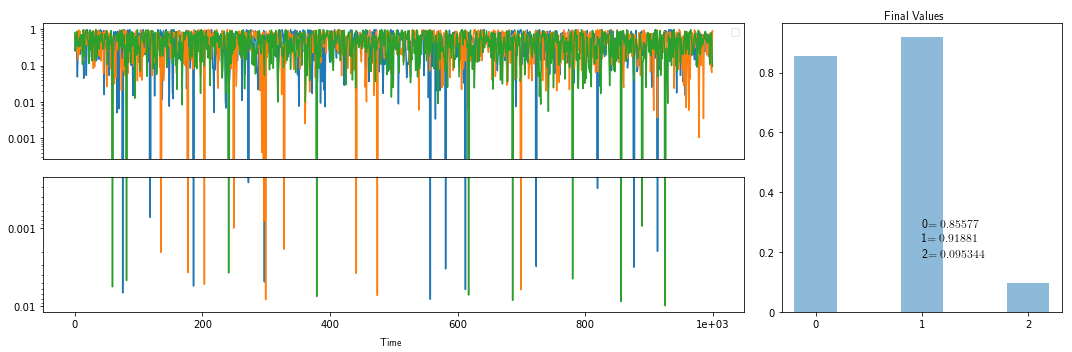

Starting Timer: Plot 


In [44]:
def AnyNegValues(flist):
    return np.min(flist)<0

def Plot(flist, flabels=[], xlist=[0,1],  size=(15,5), title='',tomography_title='SS rho', logplot=False,xrange='All',yrange='Auto',
         IncludeSSBarPlot=False, tomography_state=None,tomography_state_labels=[], tomography_state_logplot=False, 
         save_fig=False,save_fig_name='',save_fig_folder=p['directory'] , x_axis_label='Time', y_axis_label='', f=np.real):
    if pe['verbose']>0:   printtime('Plot')
    
    if len(xlist)==2: xlist = np.linspace(xlist[0],xlist[1],len(flist[0]))
    column = 1 
    width_ratios = [1]
    if IncludeSSBarPlot:
        column = column+1
        width_ratios.append(.4)
    if tomography_state:
        column = column+1
        width_ratios.append(1)
    
    countrows = 1
    if logplot:
        flistContainsNeg = AnyNegValues(flist)
        if flistContainsNeg:
            countrows += 1
    
    gs = gridspec.GridSpec(countrows, column, width_ratios=width_ratios )
    # Creates grid 'gs' of a rows and b columns 
    fig = plt.figure() 
    fig.set_size_inches( size )
    
    if  isinstance(save_fig_name , matplotlib.backends.backend_pdf.PdfPages):
        save_fig= True
    
    
    plotcolum=0
    if logplot and flistContainsNeg:
        SubLineDoubleLogPlot(flist,gs[0, plotcolum],gs[1, plotcolum],flabels, xlist,title=title,xrange=xrange,yrange=yrange, 
                xlabel=x_axis_label, ylabel=y_axis_label,f=f)         
    else:
        SubLinePlot(flist, gs[0, plotcolum], flabels, xlist,title,logplot,xrange,yrange, 
                xlabel=x_axis_label, ylabel=y_axis_label,f=f) 
  
    
    #barplot
    if IncludeSSBarPlot:        
        plotcolum=plotcolum+1 
        finaltime = [f(y[-1]) for y in flist]   
        SubBarPlot(finaltime,gs[0:countrows, plotcolum], xlist=flabels,title='Final Values')

    #2d plot
    if tomography_state:
        plotcolum=plotcolum+1
        SubStateTomography(tomography_state,gs[0, plotcolum], xlabels=tomography_state_labels, 
                           ylabels=tomography_state_labels, IsLog=tomography_state_logplot,
                        title=tomography_title,f=f)
        
    SafeAndShowfig(fig, save_fig, save_fig_name, save_fig_folder)
    if pe['verbose']>0:    printtime('Plot')
    return fig

if pe['verbose']>0:    
    tempxlist=range(1000)
    Plot([[np.random.rand()-0.01  for i in tempxlist] for f in range(3)], xlist=tempxlist  , logplot=True, IncludeSSBarPlot=True)

In [39]:
#Cumulant
def SecondCumulant(o1,o2,state):
    return qu.expect( o1*o2,state) - qu.expect(o1, state)*qu.expect(o2, state)
    
# Correlation measure
def Cij(state, Fi0 , Fj0 , Fip , Fjm ):
    cumulant = SecondCumulant( Fi0, Fj0, state) - 2 *np.real( qu.expect( Fip*Fjm,state) ) 
    maximumcorr = float(FA)*(float(FA)+1) +1/4
    return cumulant / maximumcorr
    
# Second jump Correlation 
def C2ij(state,   Fim , Fjp ): 
    cumulant = SecondCumulant( Fim*Fjp,Fim*Fjp,state) 
    maximumcorr = SecondCumulant( Fim*Fim.dag(),Fim*Fim.dag(),state) 
    if maximumcorr==0:
        maximumcorr = 1
    return cumulant / maximumcorr

    
def plotpackage(rholist, pe={}, residual=0, title='',  save_fig=False, save_fig_name='', save_fig_folder='',  tomography_plot=True, 
                tomography_state_logplot=False, logplot=False, bar_plot=False, 
                face_plot=True, plotrange_evolution=p['plotrange_evolution'] , plot_diagonalized_rho=False ):
    #select the plotrange
    if plotrange_evolution[1] == 0:
        plotrange_evolution[1] = None
       
    
    if not 'tlist' in pe:
        times = np.linspace(0, len(rholist),len(rholist)) 
    else:
        times = pe['tlist']
        if ('save_every_x_rho' in pe) and  len(rholist) != len(times):
            times = times[::pe['save_every_x_rho']]   
        if len(rholist) != len(times):
            Log('Error: len(rholist) != len(times)')
            times = np.linspace(times[0], times[-1],len(rholist)) 

    reducedrholist = rholist[plotrange_evolution[0]: plotrange_evolution[1]]    
    reducedtimes = times[plotrange_evolution[0]: plotrange_evolution[1]]
        
    rhoss =  reducedrholist[-1]

    if save_fig_name=='':      save_fig_name = mydatetime()+'.pdf'
    if save_fig_folder=='':    save_fig_folder = SubDirectory(p=p,pe=pe)     
    
    if not os.path.exists(save_fig_folder): os.makedirs(save_fig_folder)

    with PdfPages(save_fig_folder+save_fig_name) as pdfpages:
        if tomography_state_logplot in [True, False]:
            tomography_state_logplot = [tomography_state_logplot]
            
        if tomography_plot:
            for bool_logplot in tomography_state_logplot:
                Tomography(  rhoss, xlabels=allrholabels, ylabels=allrholabels, 
                       title =title+r' $\rho$('+float2str(reducedtimes[-1])+')  resid='+comp2str(residual), 
                       save_fig=save_fig, save_fig_name=pdfpages,
                       save_fig_folder=save_fig_folder, IsLog=bool_logplot)
                if p['N']>1:  
                    Tomography(  rhoss.ptrace(0), xlabels=atomlabels , ylabels=atomlabels, 
                           title =title+r' $\mathrm{Tr}_{\backslash0}(\rho)$('+float2str(reducedtimes[-1])+')  resid='+comp2str(residual), 
                           save_fig=save_fig, save_fig_name=pdfpages,
                           save_fig_folder=save_fig_folder, IsLog=bool_logplot)
        if  bar_plot:
            BarPlot( [str(a)+','+str(a)  for a in atomlabels ] ,qu.ptrace(rhoss,0).diag(),   save_fig=save_fig,save_fig_folder=save_fig_folder,save_fig_name=pdfpages,
                   title=title+' diag elements of 1 atom')
        if logplot in [True, False]:
            logplot = [logplot]
            
            
                
        if pe['verbose']>-0.1:  printtime('Calc Plotvalues')
        # Lineplots
        e_ops = e_ops0
        e_ops_labels= e_ops_labels0
        plotvalues =     [[qu.expect(op, rho )  for rho in reducedrholist]   for op in e_ops]                  
        if pe['verbose']>-0.1:  printtime('Calc Plotvalues',deletetimer=False)
                
        if  face_plot and len(reducedrholist)>1:  
            flist = np.array([ qu.ptrace(rholist[ti],0).diag() for ti in range(len(reducedrholist))   ])    # thi shas the dimensions [t,f]
            flist = np.array(flist).transpose((1,0))   # now it's [f,t]
            for bool_logplot in logplot:
                FacePlot( flist,  flabels=[r'$\left|'+str(a)+r'\right\rangle\left\langle'+str(a)+r'\right|$'  for a in atomlabels ], 
                         xlist = reducedtimes,
                         save_fig=save_fig,save_fig_folder=save_fig_folder,save_fig_name=pdfpages
                                , title=title+' evolution of diag elements  Log='+str(bool_logplot), x_label='t',  size=(60,20),logplot=bool_logplot)


        if p['N']>1:
            # add the cumulants
            plotvalues += [[SecondCumulant(tF(0,0),tF(1,0),rho)  for rho in reducedrholist]]    
            e_ops_labels += [ r'$\left\langle F_0^0 F_0^1 \right\rangle_c$' ]
            #plotvalues += [[SecondCumulant(tF(0,-1)*tF(1,1),tF(0,-1)*tF(1,1),rho)  for rho in reducedrholist]]    
            #e_ops_labels += [ r'$\left\langle (tF(0,-1)*tF(1,1))^2 \right\rangle_c$' ]
            if superradiantsettings:
                plotvalues += [[SecondCumulant(tF(0,1),tF(1,-1),rho)/(tF(0,1)*tF(1,-1)).norm(norm='max')  for rho in reducedrholist]]       
                e_ops_labels += [ r'$\left\langle s^+_0 s^-_1 \right\rangle_c$']                    

            # add the ccorrelation measure
            plotvalues += [[Cij(rho,Fi0= tF(0,0), Fj0= tF(1,0), Fip= tF(0,1), Fjm= tF(1,-1))  for rho in reducedrholist]]    
            e_ops_labels += [ r'$C^{ij}$' ]
            if pe['verbose']>-0.1:  printtime('Calc Plotvalues',deletetimer=False)

#                 # add the second jump ccorrelation measure
#                 plotvalues += [[C2ij(rho,  Fim= tF(0,-1), Fjp= tF(1,1))  for rho in reducedrholist]]    
#                 e_ops_labels += [ r'$\frac{\left\langle (F^0_+ F^1_-)^2 \right\rangle_c }{\left\langle (F^0_+ F^0_-)^2 \right\rangle_c }$' ]

            # add perfect correlation maximum
            #plotvalues += [[CorrMeasure(rho,Fi0= tF(0,0), Fj0= tF(0,0), Fip= tF(0,1), Fjm= tF(0,-1))  for rho in reducedrholist]]    
            #e_ops_labels += [ r'$\left\langle \vec F^0 \cdot \vec F^0 \right\rangle_c$' ]


            # add trace distance of rho0 and rho1
            plotvalues += [[(qu.ptrace(rho,0)-qu.ptrace(rho,1)).norm(norm='max')  for rho in reducedrholist]]                                    
            e_ops_labels += [ r'$|\rho_0-\rho_1|_\infty$' ]
            if pe['verbose']>-0.1:  printtime('Calc Plotvalues',deletetimer=False)


        if bool_EV_plot:
            if pe['verbose']>-0.1:  printtime('Calc EVs')
            EVvalues = np.array([rho.eigenenergies() for rho in reducedrholist])
            EVvaluesmin = np.array([np.min(evs)  for evs in EVvalues] )
            
            EVvaluespos = EVvaluesmin
            EVvaluespos[EVvaluespos>=0]=1
            EVvaluespos[EVvaluespos<0]=0
            if pe['verbose']>-0.1:  printtime('Calc EVs')
            # add EV 
            plotvalues +=    [ EVvaluesmin  ,EVvaluespos  ]    
            e_ops_labels +=  [r'$\mathrm{min}(EV)$', r'Positive']
        if pe['verbose']>-0.1:  printtime('Calc Plotvalues')

        pickle.dump(  (reducedtimes, plotvalues, e_ops_labels, p, pe), open( save_fig_folder+Path2Filename(save_fig_name, RemoveEnding=True)+' Lineplot.save', "wb" ) ) 

        for bool_logplot in logplot:
            if pe['verbose']>-0.1:  printtime('Plot')
            Plot(plotvalues ,flabels=e_ops_labels, xlist=reducedtimes
                 ,title=title+r'  Log$=$'+str(bool_logplot)+r' resid$=$'+comp2str(residual)+r'  plotsteps$=$'+str(len(reducedrholist))  ,
                 IncludeSSBarPlot=True, save_fig=save_fig, save_fig_folder=save_fig_folder,  save_fig_name=pdfpages, tomography_state_logplot=tomography_state_logplot,
                 logplot=bool_logplot, tomography_title=r'SS at time $=$'+comp2str(reducedtimes[-1]) )
            if pe['verbose']>-0.1:  printtime('Plot')


        if plot_diagonalized_rho and bool_EV_plot:
            plotvalues = EVvalues
            plotvalues = plotvalues.transpose()
            for bool_logplot in logplot:
                if pe['verbose']>-0.1:  printtime('Plot EVs')
                Plot(plotvalues ,xlist=reducedtimes
                     ,title=r'Eigenenergies,  Log$=$'+str(bool_logplot)+r' resid$=$'+comp2str(residual)+r'  plotsteps$=$'+str(len(reducedrholist))  ,
                     IncludeSSBarPlot=True, save_fig=save_fig, save_fig_folder=save_fig_folder,  save_fig_name=pdfpages, tomography_state_logplot=tomography_state_logplot,
                     logplot=bool_logplot, tomography_title=r'SS at time $=$'+comp2str(reducedtimes[-1]) )
                if pe['verbose']>-0.1:  printtime('Plot EVs')

            if p['N']>1:  
                plotvalues = np.array([ qu.ptrace(rho,0).eigenenergies() for rho in reducedrholist])
                plotvalues = plotvalues.transpose()
                for bool_logplot in logplot:
                    if pe['verbose']>-0.1:  printtime('Plot EVs traced')
                    Plot(plotvalues, xlist=reducedtimes 
                         ,title=r'Eigenenergies of atom 0,  Log$=$'+str(bool_logplot)+r' resid$=$'+comp2str(residual)+r'  plotsteps$=$'+str(len(reducedrholist))  ,
                         IncludeSSBarPlot=True, save_fig=save_fig, save_fig_folder=save_fig_folder,  save_fig_name=pdfpages, tomography_state_logplot=tomography_state_logplot,
                         logplot=bool_logplot, tomography_title=r'SS at time $=$'+comp2str(reducedtimes[-1]) )
                    if pe['verbose']>-0.1:  printtime('Plot EVs traced')

        TextPlot( dic2str(p,shorten=False,lineend='\\\\').replace(r'_',r' ').replace('.save,','.save\\\\') , save_fig_name=pdfpages )
        TextPlot( dic2str(pe,shorten=False,lineend='\\\\').replace(r'_',r' ').replace('.save,','.save\\\\') , save_fig_name=pdfpages )



    
def Evalauetrholist(rholist, xlabels=None, x_axis_label='', save_fig=True, save_fig_name='', save_fig_folder='',pe={}):
    if save_fig_name=='':      save_fig_name = mydatetime()+'.pdf'
    if save_fig_folder=='':    save_fig_folder = SubDirectory(p=p,pe=pe)     
    if not os.path.exists(save_fig_folder): os.makedirs(save_fig_folder)
    with PdfPages(save_fig_folder+save_fig_name) as pdfpages:
        # Lineplots
        e_ops = e_ops0
        e_ops_labels = e_ops_labels0
        plotvalues =     [[qu.expect(op, rho )  for rho in rholist]   for op in e_ops] 

        if p['N']>1:
            # add the cumulants
            plotvalues += [[SecondCumulant(tF(0,0),tF(1,0),rho)  for rho in rholist]]    
            e_ops_labels += [ r'$\left\langle F_0^0 F_0^1 \right\rangle_c$' ]

            # add the ccorrelation measure
            plotvalues += [[Cij(rho,Fi0= tF(0,0), Fj0= tF(1,0), Fip= tF(0,1), Fjm= tF(1,-1))  for rho in rholist]]    
            e_ops_labels += [ r'$C^{ij}$' ]

#                 # add the second jump ccorrelation measure
#                 plotvalues += [[C2ij(rho,  Fim= tF(0,-1), Fjp= tF(1,1))  for rho in rholist]]    
#                 e_ops_labels += [ r'$\frac{\left\langle (F^0_+ F^1_-)^2 \right\rangle_c }{\left\langle (F^0_+ F^0_-)^2 \right\rangle_c }$' ]

            # add perfect correlation maximum
            #plotvalues += [[CorrMeasure(rho,Fi0= tF(0,0), Fj0= tF(0,0), Fip= tF(0,1), Fjm= tF(0,-1))  for rho in reducedrholist]]    
            #e_ops_labels += [ r'$\left\langle \vec F^0 \cdot \vec F^0 \right\rangle_c$' ]


        if bool_EV_plot:
            # add EV
            EVvalues = [ MinEigenvalue(rho)  for rho in rholist] 
            plotvalues +=    [(np.array(EVvalues))  ]   +   [  [int(i>=0) for i in EVvalues]  ]    
            e_ops_labels += [r'$\mathrm{min}(EV)$']+ [r'Positive']


        for log in [False, True]:
            Plot(plotvalues,flabels=e_ops_labels, xlist=xlabels, save_fig=save_fig,  title='Polarization',  
                 save_fig_name=pdfpages  ,  x_axis_label=x_axis_label , logplot=log, IncludeSSBarPlot=True)
        TextPlot( dic2str(p,shorten=False,lineend='\\\\').replace(r'_',r' ').replace('.save,','.save\\\\') , save_fig_name=pdfpages )
        TextPlot( dic2str(pe,shorten=False,lineend='\\\\').replace(r'_',r' ').replace('.save,','.save\\\\') , save_fig_name=pdfpages )